In [1]:
# Importing Libraries
try:
    import pandas as pd
    import numpy as np
    import os,sys
    import re
    import matplotlib.pyplot as plt
    # importing algorithms
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import KFold, cross_val_score
    from sklearn import svm
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.preprocessing import StandardScaler, Normalizer
except Exception as e:
    print("Error is due to",e)
pwd = os.getcwd()
labels_df = pd.read_csv(pwd+"//Datasets//Kabita//Input//kabita_dataset_labels.csv")
y_df = labels_df['kabita_labels']

### Hypothesis test of Standard Scaled GPT Fine tuned Hinglish Logistic and SVM Models

In [2]:
# GPT Hinglish vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//FineTunedTransformers//gpt_hinglish_finetuned_vectorized_kabita_dataset.csv")

# Total data transform
standard_model = StandardScaler()
scaled_data = standard_model.fit_transform(x_df)

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y_df, test_size=0.30,random_state=21,stratify=y_df)

# Standard scaling of train data
standard_model = StandardScaler()
sscaled_data_train = standard_model.fit_transform(x_train)
# Standard scaling of test data
sscaled_data_test = standard_model.fit_transform(x_test)

In [3]:
# SVM Model

# Modelling according to the hyper parameters

svm_model = svm.SVC(kernel='rbf')

svm_model.fit(sscaled_data_train, y_train)

print("SVM Model Accuracy is:", svm_model.score(sscaled_data_test, y_test))

SVM Model Accuracy is: 0.7979591836734694


In [4]:
# Logistic Regression

lr_model = LogisticRegression(max_iter=5000)

lr_model.fit(sscaled_data_train, y_train)

print("Logistic Regression Model Accuracy is:", lr_model.score(sscaled_data_test, y_test))

Logistic Regression Model Accuracy is: 0.7816326530612245


In [5]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=svm_model,estimator2=lr_model,X=scaled_data, y=y_df)
alpha = 0.05

print("H0: There is no difference between the Two models.\nH1: One Model is best than other.")

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
    print("Fail to reject null hypotesis")
else:
    print("Reject null hypotesis")

H0: There is no difference between the Two models.
H1: One Model is best than other.
t statistic: 1.450
aplha  0.05
p value: 0.207
Fail to reject null hypotesis


SVM Accuracy: 78.40816326530613
Logistic Regression Accuracy: 75.9795918367347


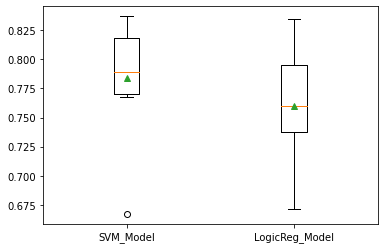

In [6]:
# Applying K-Fold
kfold = KFold(n_splits=10)

# SVM Model
svm_model = svm.SVC(kernel='rbf')
svm_results = cross_val_score(svm_model, scaled_data, y_df, cv=kfold)
print("SVM Accuracy:", svm_results.mean()*100.0)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=5000)
lr_results = cross_val_score(lr_model, scaled_data, y_df, cv=kfold)
print("Logistic Regression Accuracy:", lr_results.mean()*100.0)

# plotting the mean scores
plt.boxplot([svm_results, lr_results], labels=['SVM_Model', 'LogicReg_Model'], showmeans=True)
plt.show()

### Hypothesis test of Normalize Scaled Verloop Hinglish Logistic and SVM Models

In [7]:
# Verloop Hinglish vectorized data
x_df = pd.read_csv(pwd+"//Datasets//Kabita//SentenceTransformers//bert_vectorized_kabita_dataset_vbert.csv")

# Total data transform
normalize_model = Normalizer()
scaled_data = normalize_model.fit_transform(x_df)

# Test train split
x_train,x_test,y_train,y_test = train_test_split(x_df, y_df, test_size=0.30,random_state=21,stratify=y_df)

# Normalize scaling of train data
normalize_model = Normalizer()
nscaled_data_train = normalize_model.fit_transform(x_train)
# Normalize scaling of test data
nscaled_data_test = normalize_model.fit_transform(x_test)

In [8]:
# SVM Model

# Modelling according to the hyper parameters

svm_model = svm.SVC(kernel='poly')

svm_model.fit(nscaled_data_train, y_train)

print("SVM Model Accuracy is:", svm_model.score(nscaled_data_test, y_test))

SVM Model Accuracy is: 0.7952380952380952


In [9]:
# Logistic Regression

lr_model = LogisticRegression(max_iter=5000)

lr_model.fit(nscaled_data_train, y_train)

print("Logistic Regression Model Accuracy is:", lr_model.score(nscaled_data_test, y_test))

Logistic Regression Model Accuracy is: 0.7537414965986394


In [10]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=svm_model,estimator2=lr_model,X=scaled_data, y=y_df)
alpha = 0.05

print("H0: There is no difference between the Two models.\nH1: One Model is best than other.")

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
    print("Fail to reject null hypotesis")
else:
    print("Reject null hypotesis")

H0: There is no difference between the Two models.
H1: One Model is best than other.
t statistic: 9.930
aplha  0.05
p value: 0.000
Reject null hypotesis


SVM Accuracy: 77.85714285714285
Logistic Regression Accuracy: 74.91836734693878


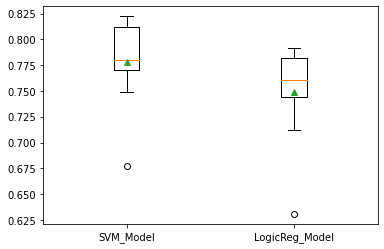

In [11]:
# Applying K-Fold
kfold = KFold(n_splits=10)

# SVM Model
svm_model = svm.SVC(kernel='rbf')
svm_results = cross_val_score(svm_model, scaled_data, y_df, cv=kfold)
print("SVM Accuracy:", svm_results.mean()*100.0)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=5000)
lr_results = cross_val_score(lr_model, scaled_data, y_df, cv=kfold)
print("Logistic Regression Accuracy:", lr_results.mean()*100.0)

# plotting the mean scores
plt.boxplot([svm_results, lr_results], labels=['SVM_Model', 'LogicReg_Model'], showmeans=True)
plt.show()